**Problem Statement** - Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train_bikes.csv', parse_dates = ['datetime']) # loading the training data

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.tail() # looking at the training data from end

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
train.season.value_counts() # counting values of season column

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [5]:
plt.style.use('ggplot')

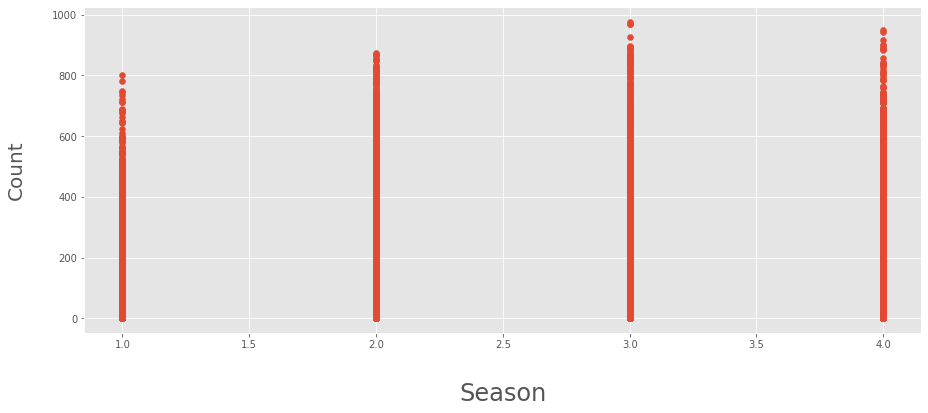

In [6]:
# Plotting the counts based on season
plt.figure(figsize = (15, 6))
plt.scatter(x = train['season'], y = train['count'])
plt.xlabel('\nSeason', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [7]:
train.holiday.value_counts() # counting values of holiday column

0    10575
1      311
Name: holiday, dtype: int64

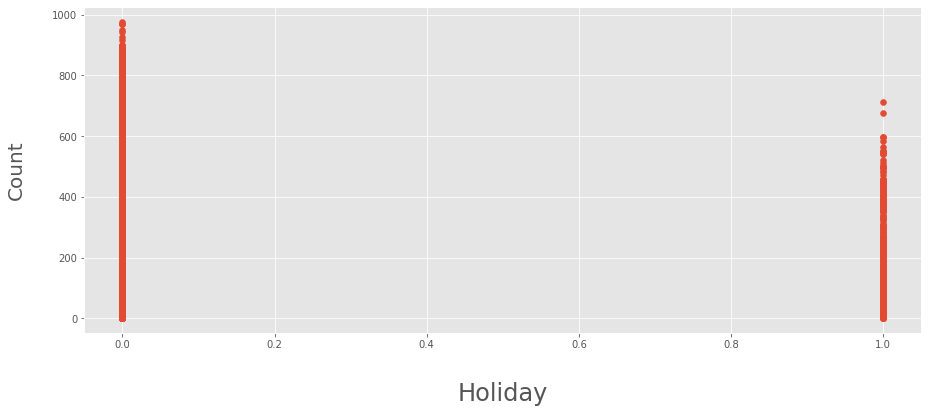

In [8]:
# Plotting the counts based on holiday
plt.figure(figsize = (15, 6))
plt.scatter(x = train['holiday'], y = train['count'])
plt.xlabel('\nHoliday', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [9]:
train.workingday.value_counts() # counting values of workingday column

1    7412
0    3474
Name: workingday, dtype: int64

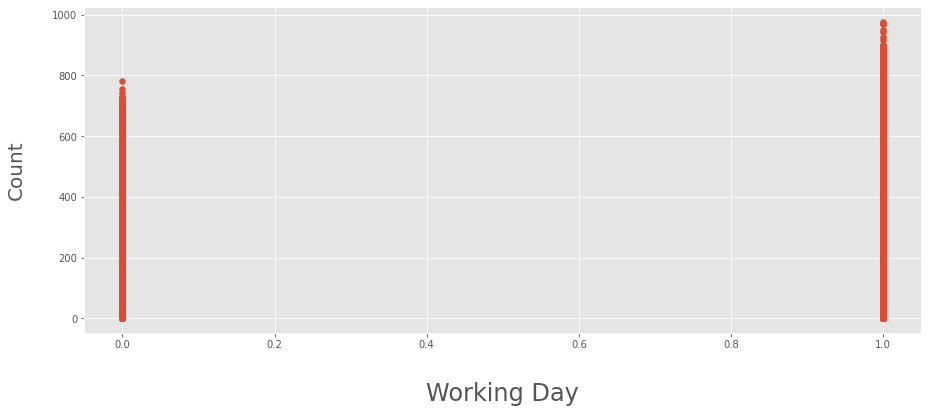

In [10]:
# Plotting the counts based on working day
plt.figure(figsize = (15, 6))
plt.scatter(x = train['workingday'], y = train['count'])
plt.xlabel('\nWorking Day', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [11]:
train.weather.value_counts() # counting values of weather column

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

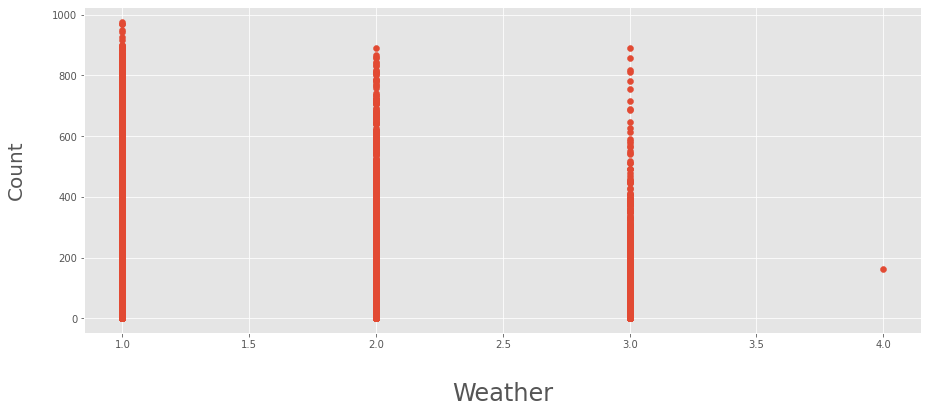

In [12]:
# Plotting the counts based on weather
plt.figure(figsize = (15, 6))
plt.scatter(x = train['weather'], y = train['count'])
plt.xlabel('\nWeather', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [13]:
train.temp.value_counts() # counting values of temp column

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

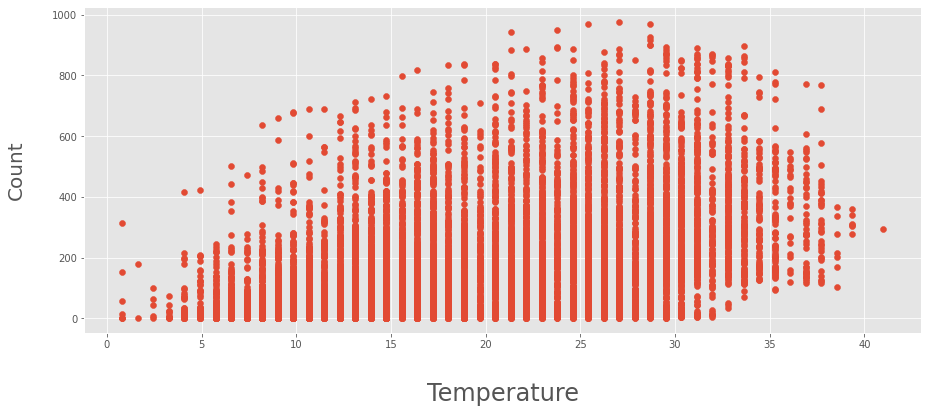

In [14]:
# Plotting the counts based on temperature
plt.figure(figsize = (15, 6))
plt.scatter(x = train['temp'], y = train['count'])
plt.xlabel('\nTemperature', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [15]:
train.atemp.value_counts() # counting values of atemp column

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
43.940      7
43.180      7
2.275       7
3.030       7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

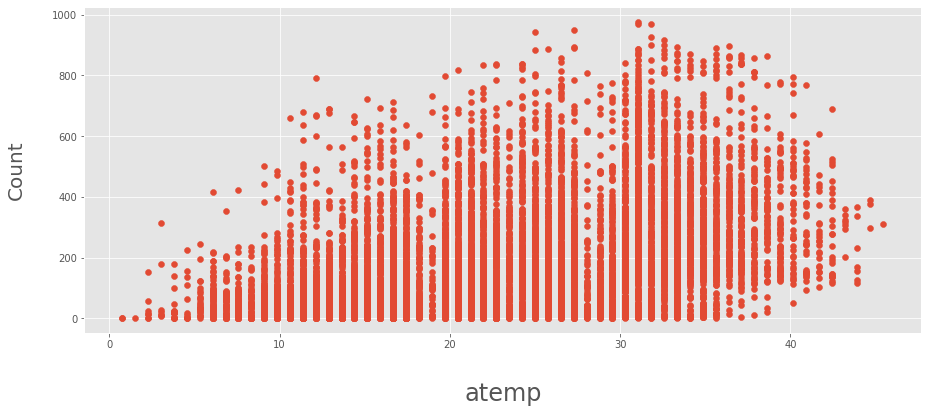

In [16]:
# Plotting the counts based on temperature
plt.figure(figsize = (15, 6))
plt.scatter(x = train['atemp'], y = train['count'])
plt.xlabel('\natemp', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [17]:
train.humidity.value_counts() # counting values of humidity column

88    368
94    324
83    316
87    289
70    259
     ... 
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

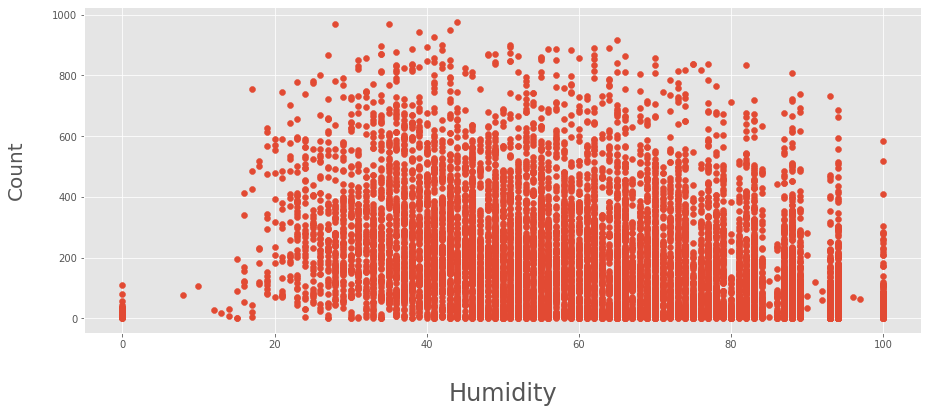

In [18]:
# Plotting the counts based on temperature
plt.figure(figsize = (15, 6))
plt.scatter(x = train['humidity'], y = train['count'])
plt.xlabel('\nHumidity', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [19]:
train.windspeed.value_counts() # counting values of windspeed column

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

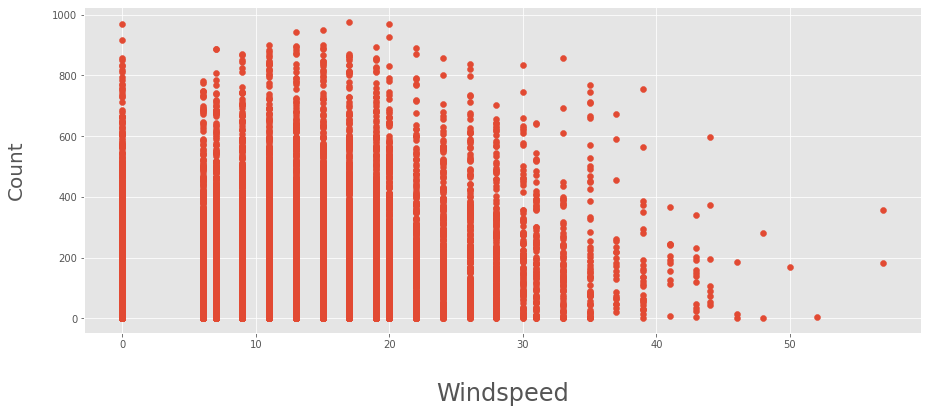

In [20]:
# Plotting the counts based on windspeed
plt.figure(figsize = (15, 6))
plt.scatter(x = train['windspeed'], y = train['count'])
plt.xlabel('\nWindspeed', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [21]:
train.casual.value_counts() # counting values of casual column

0      986
1      667
2      487
3      438
4      354
      ... 
291      1
327      1
331      1
355      1
299      1
Name: casual, Length: 309, dtype: int64

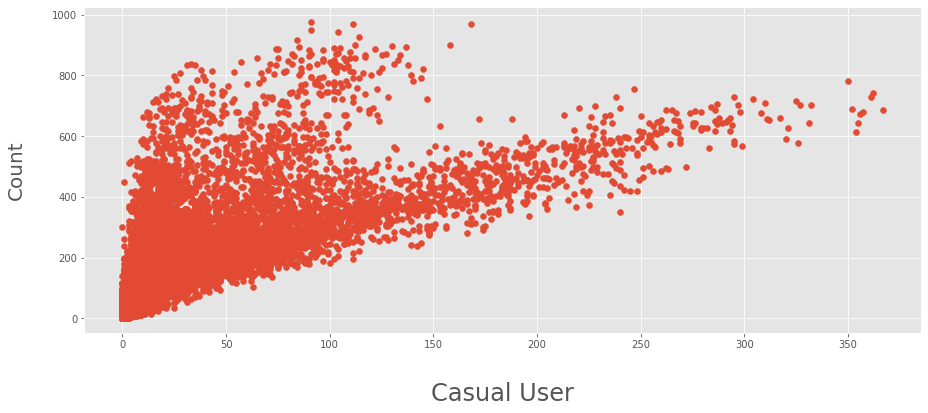

In [22]:
# Plotting the counts based on casual user
plt.figure(figsize = (15, 6))
plt.scatter(x = train['casual'], y = train['count'])
plt.xlabel('\nCasual User', fontsize = 24)
plt.ylabel('Count\n', fontsize = 20)
plt.show()

In [23]:
train.info() # observing the data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [24]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [25]:
test = pd.read_csv('test_bikes.csv', parse_dates = ['datetime']) # loading the test data

test.head() #looking at the 1st 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [26]:
test.tail() # last 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [27]:
test.info() # observing the data types of columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [28]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [29]:
print("count samples & features: ", train.shape) # printing the number of rows and columns
print("Are there missing values: ", train.isnull().values.any()) # printing if dataset has any NaN value

count samples & features:  (10886, 12)
Are there missing values:  False


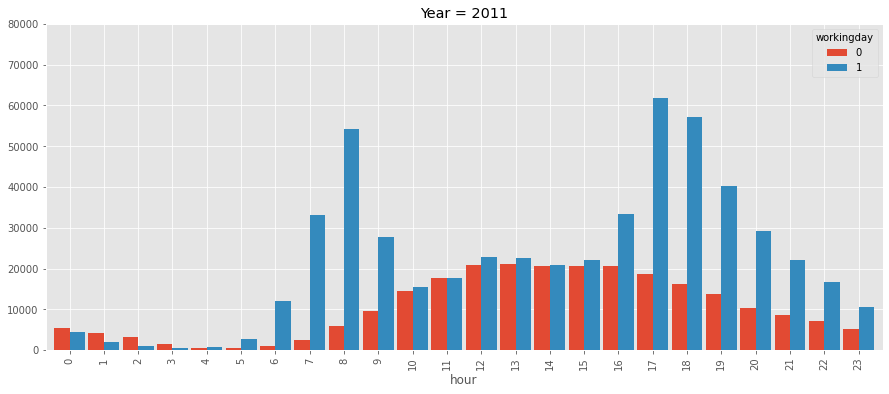

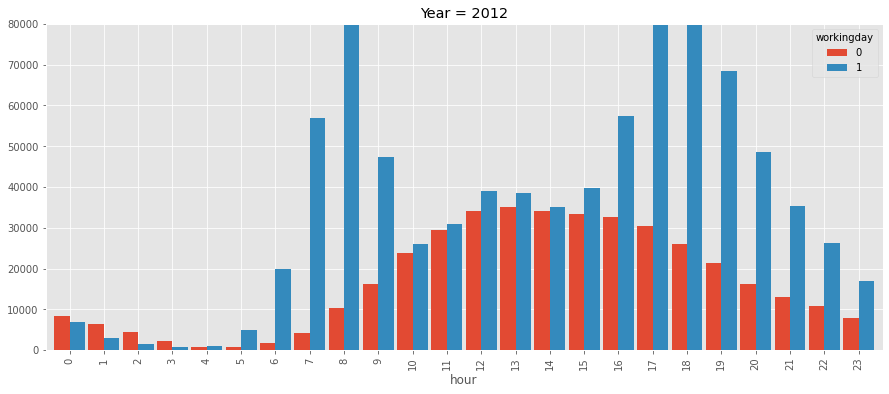

In [30]:
# Method for creating the count plot based on hour for given year

def plot_by_hour(data, year = None, agg = 'sum'):
    dd = data
    if year: dd = dd[dd.datetime.dt.year == year]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to year passed as argument
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # group by hour and working day
    return by_hour.plot(kind = 'bar', ylim = (0, 80000), figsize = (15, 6), width = 0.9, title = "Year = {0}".format(year)) # returning the figure grouped by hour

plot_by_hour(train, year = 2011) # plotting the count plot based on hour for 2011
plot_by_hour(train, year = 2012) # plotting the count plot based on hour for 2012

plt.show()

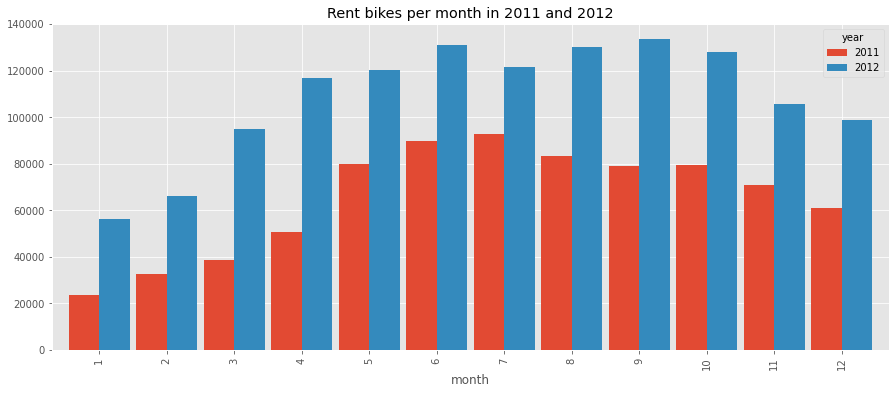

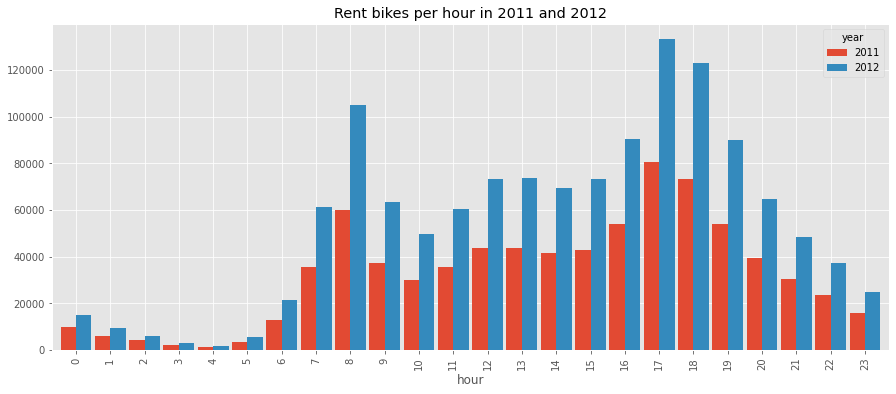

In [31]:
# Method for creating the count plot based on year

def plot_by_year(agg_atr, title):
    dd = train.copy()
    dd['year'] = train.datetime.dt.year # Extracting the year
    dd['month'] = train.datetime.dt.month # Extracting the month
    dd['hour'] = train.datetime.dt.hour # Extracting the hour
    
    by_year = dd.groupby([agg_atr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind = 'bar', figsize = (15, 6), width = 0.9, title = title) # returning the figure grouped by year

plot_by_year('month', 'Rent bikes per month in 2011 and 2012') # plotting monthly bike rentals based on year
plot_by_year('hour', 'Rent bikes per hour in 2011 and 2012') # plotting hourly bike rentals based on year

plt.show()

In [51]:
# method to plot a graph for count per hour
def plot_hours(data, message =''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extracting the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[dd.hour == hour]['count'].values
    
    plt.figure(figsize = (20, 10))
    plt.boxplot([hours[hour] for hour in range(24)])
    plt.xlabel('Hours')
    plt.ylabel('Count rent')
    plt.title('Count vs Hours\n' + message)
    
    axis = plt.gca()

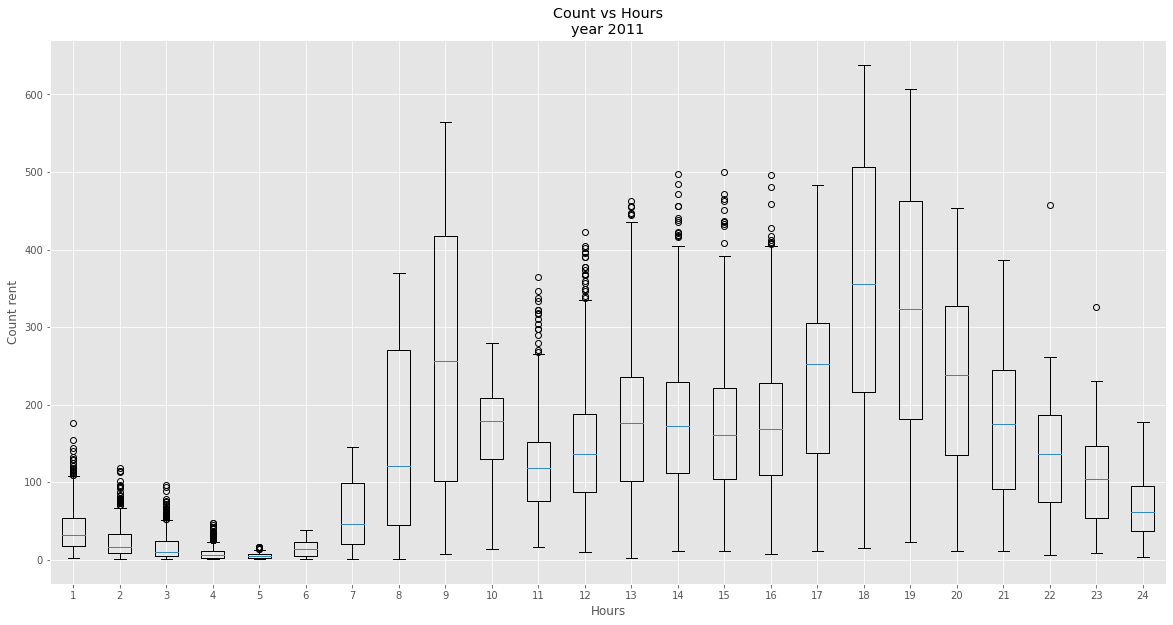

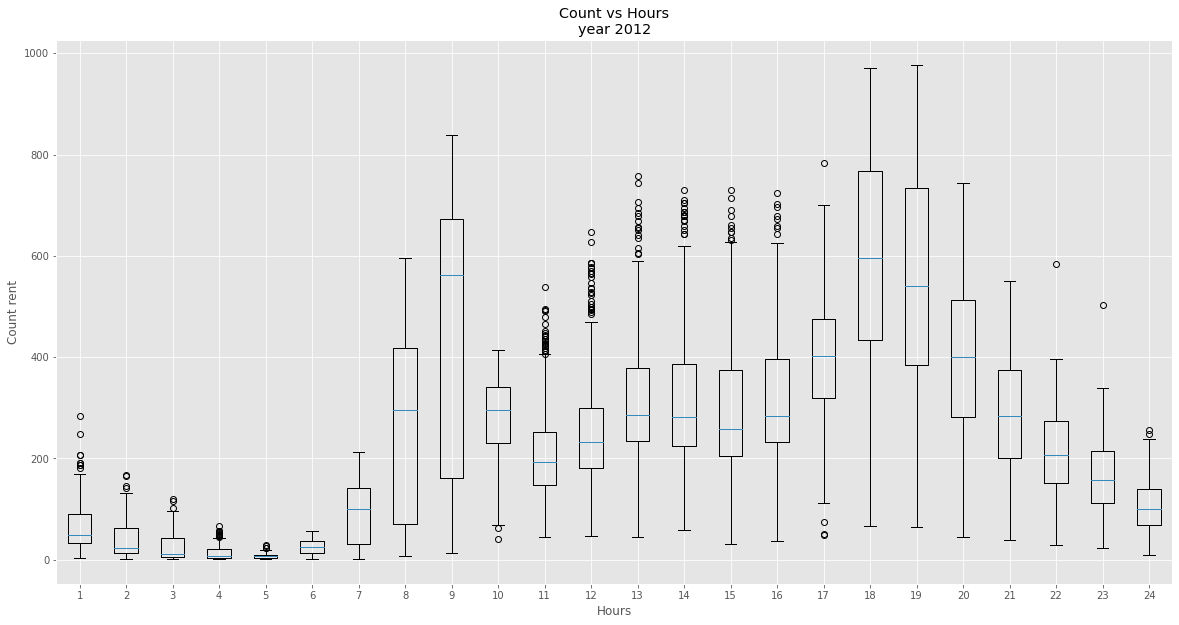

In [52]:
plot_hours(train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours(train[train.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

In [53]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [54]:
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [55]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [60]:
train['hour'] = train.datetime.dt.hour # adding the hour column for train dataset

In [61]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [62]:
test['hour'] = test.datetime.dt.hour # adding the hour column for test dataset

In [63]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


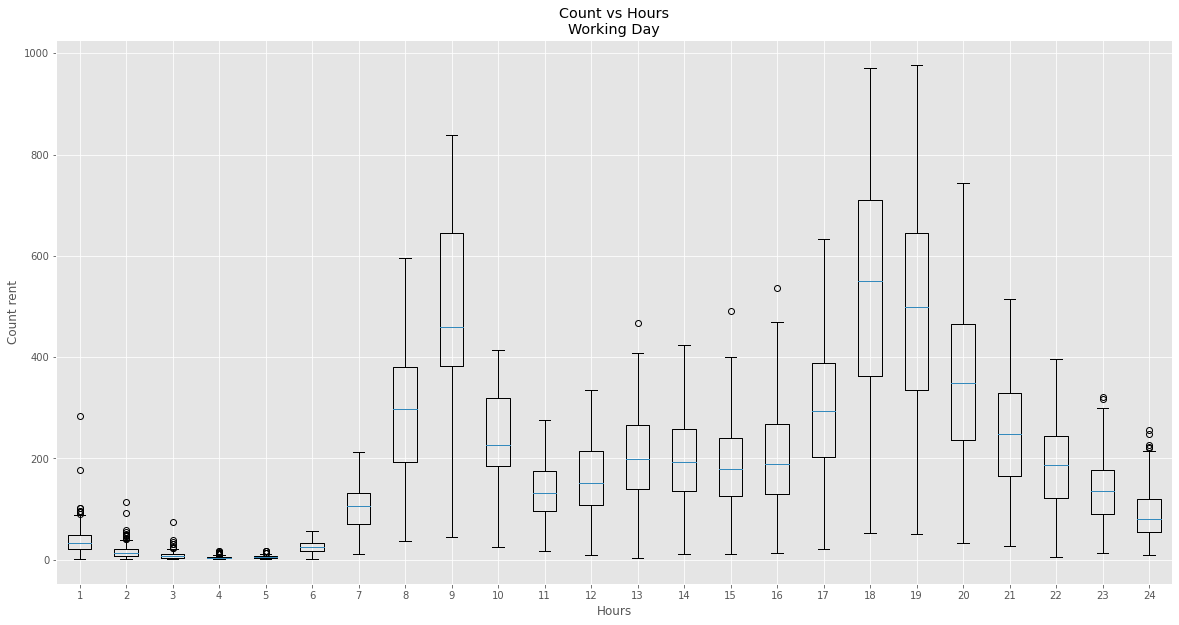

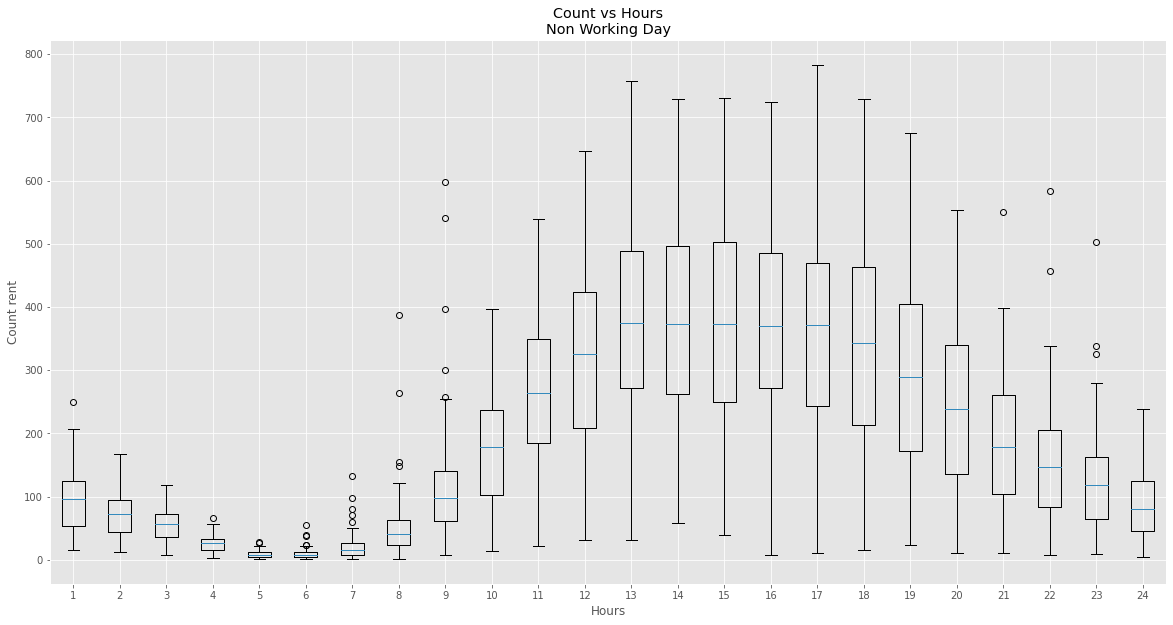

In [65]:
plot_hours(train[train.workingday == 1], 'Working Day') # plotting hourly count of rented bikes for working days for a given year
plot_hours(train[train.workingday == 0], 'Non Working Day') # plotting hourly count of rented bikes for non-working days for a given year

In [66]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <= x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x <= 24:
        return 3

In [67]:
train['hour'] = train['hour'].apply(categorical_to_numeric) # applying the above conversion logic to training data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [68]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [69]:
# drop unnecessary columns
train = train.drop(['datetime'], axis = 1)
test = test.drop(['datetime'], axis = 1)

In [70]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [71]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,1,1,10.66,11.365,56,26.0027,0
1,1,0,1,1,10.66,13.635,56,0.0000,0
2,1,0,1,1,10.66,13.635,56,0.0000,0
3,1,0,1,1,10.66,12.880,56,11.0014,0
4,1,0,1,1,10.66,12.880,56,11.0014,0


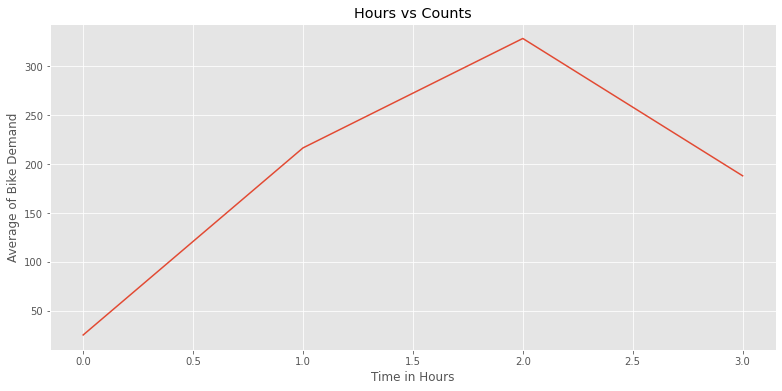

In [77]:
# an hour by Count Graph depicting average bike demand based on the hour 
fig, ax = plt.subplots(figsize = (13, 6))
hours = train.groupby(['hour']).agg("mean")["count"]
hours.plot(kind = 'line', ax = ax)
plt.title('Hours vs Counts')
ax.set_xlabel('Time in Hours')
ax.set_ylabel('Average of Bike Demand')
plt.show()

In [78]:
# count of different temp values
a = train.groupby(['temp'])[['count']].mean()
a

,count
temp,
0.82,77.714286
1.64,91.500000
2.46,43.000000
3.28,19.272727
4.10,50.272727
4.92,58.416667
5.74,53.233645
6.56,68.109589
7.38,67.754717


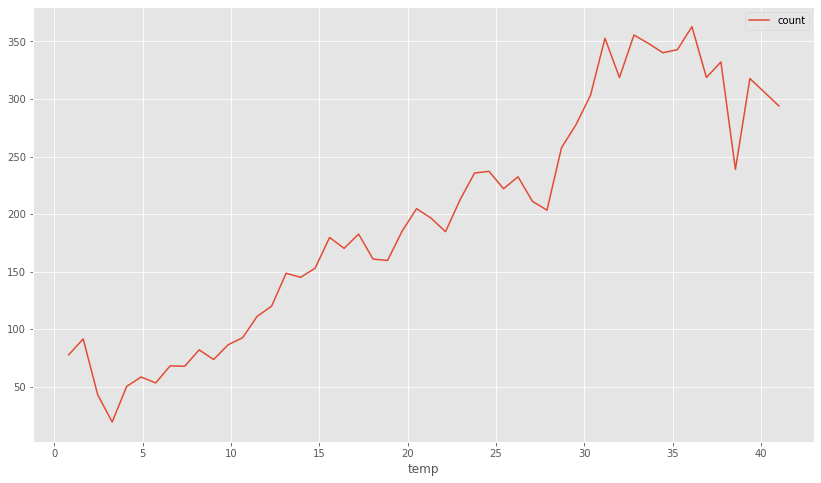

In [82]:
fig, ax = plt.subplots(figsize = (14, 8))
a.plot(ax = ax)
plt.show()

In [83]:
# count of different atemp values
a = train.groupby(['atemp'])[['count']].mean()
a

,count
atemp,
0.760,1.000000
1.515,3.000000
2.275,38.000000
3.030,82.285714
3.790,39.062500
4.545,66.090909
5.305,63.200000
6.060,64.876712
6.820,56.380952


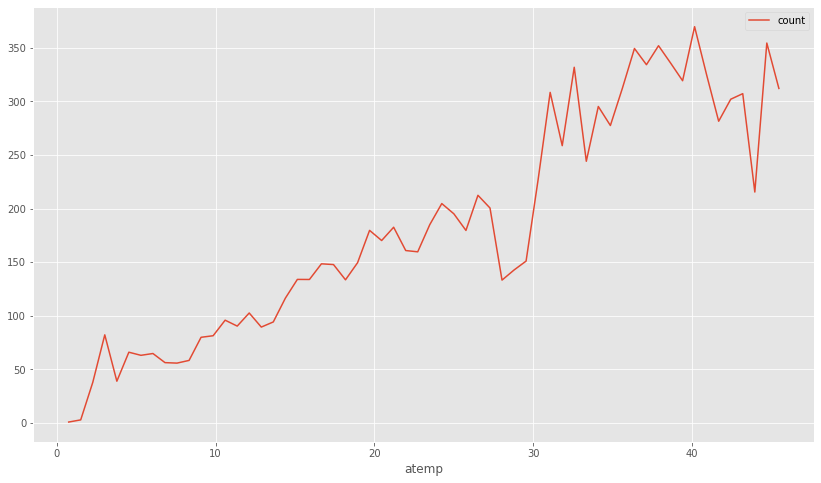

In [84]:
fig, ax = plt.subplots(figsize = (14, 8))
a.plot(ax = ax)
plt.show()

In [85]:
# count based on holiday
a = train.groupby('holiday')[['count']].mean()
a

,count
holiday,
0,191.741655
1,185.877814


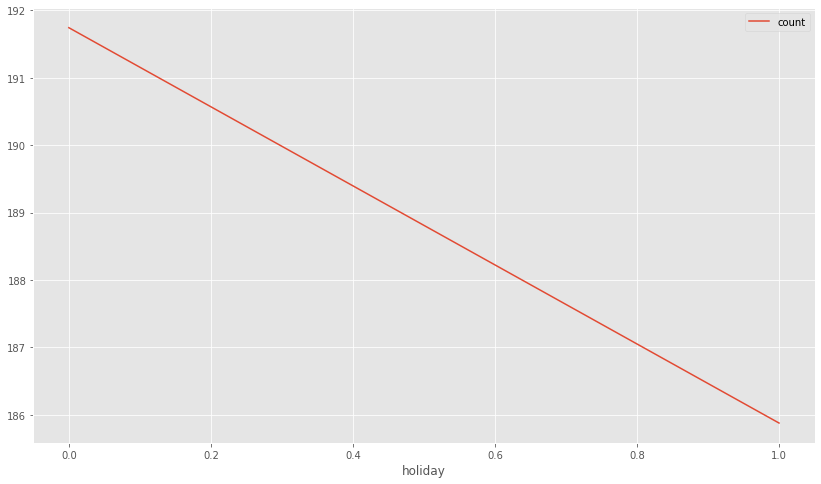

In [86]:
fig, ax = plt.subplots(figsize = (14, 8))
a.plot(ax = ax)
plt.show()

In [88]:
# method to  select the features. If a feature is not in the blaklist, it gets selected
def select_features(data):
    black_list = ['casual', 'registered', 'count', 'is_test', 'datetime', 'count_log']
    return [feature for feature in data.columns if feature not in black_list]

In [89]:
# a method to show results of various model and their predictions
def _simple_modeling(X_train, X_test, y_train, y_test):
    # sepcifying the model names
    models = [
        ('dummy-mean', DummyRegressor(strategy='mean')),
        ('dummy-median', DummyRegressor(strategy='median')),
        ('random-forest', RandomForestRegressor(random_state=0)),
    ]
    
    results = []

    for name, model in models:
        model.fit(X_train, y_train)# fitting the training data to model
        y_pred = model.predict(X_test) # doing predictions using the model
        
        results.append((name, y_test, y_pred)) # creating the list of predictions from various models
        
    return results

# a method to return the performance metric of the model used in the above method
def simple_modeling(X_train, X_test, y_train, y_test):
    results = _simple_modeling(X_train, X_test, y_train, y_test) # using the function defined above to caluclate the predictions
    
    return [ (r[0], rmsle(r[1], r[2]) ) for r in results] # returning the performance metrics

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, train, train, cv=4) # calcuating the cross validation score
print (score)

[0.99513799 0.99709131 0.99770864 0.99736786]
